# Social Network Analysis: Violent Topic Diffusion

Jouni Huopana

17.04.2020

Student ID: 1720198

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

Reading the compressed Ummah-file. The file does not contain any text; topics and messages are removed.

In [40]:
filename = "input/Ummah_no_messages.txt"
data = pd.read_csv(filename)
data['P_Date'] = data['P_Date'].astype('datetime64[ns]')
data.head()

,MessageID,ThreadID,MemberID,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID,MessageLength
0,1000,150,72,2002,4,3,2002-04-03 23:14:00,762,286
1,10000,1105,40,2002,4,15,2002-04-15 15:58:00,9915,1286
2,1000006,80406,15097,2006,3,9,2006-03-09 23:28:00,998298,85
3,1000016,80522,13617,2006,3,9,2006-03-09 23:36:00,999966,92
4,1000027,57891,4153,2006,3,9,2006-03-09 23:56:00,640315,1945


Example of the data. Most important to the analysis are MemberID, ThreadID, P_Date, ThreadFirstMessageID and MessageLength.

In [41]:
all_threads = data["ThreadID"].unique()
all_members = data["MemberID"].unique()

print("Data size is",data.shape)
print("There is",len(all_threads),"threads in the data.")
print("There is",len(all_members),"members in the data.")
print("Data has",data["P_Date"].max()-data["P_Date"].min())

Data size is (1484909, 9)
There is 91313 threads in the data.
There is 17182 members in the data.
Data has 3699 days 12:13:00


In [42]:
#Collecting thread information (this takes a while)
thread_data = pd.DataFrame(np.zeros(len(all_threads)),index=all_threads,columns=['N_Members'])
thread_data['N_Days'] = 0
thread_data['Mean_L'] = 0
ii = 0
for i in all_threads:
    one_data = data[data['ThreadID']==i]
    #Get time frame
    delta_t = one_data["P_Date"].max() - one_data["P_Date"].min()
    thread_data.loc[i, 'N_Days'] = delta_t.days + delta_t.seconds/(60*60*24)
    thread_data.loc[i, 'N_Members'] = int(len(one_data["MemberID"].unique()))
    thread_data.loc[i, 'Mean_L'] = one_data[" MessageLength"].mean()
    ii = ii + 1
    if ii%10000==0:
        print(ii,'out of',len(all_threads))

thread_data.head()

10000 out of 91313
20000 out of 91313
30000 out of 91313
40000 out of 91313
50000 out of 91313
60000 out of 91313
70000 out of 91313
80000 out of 91313
90000 out of 91313


,N_Members,N_Days,Mean_L
150,22.0,35.008333,1155.250000
1105,5.0,0.229167,1364.166667
80406,36.0,6.678472,240.480392
80522,26.0,3.097222,506.484848
57891,54.0,2275.561806,1809.565445


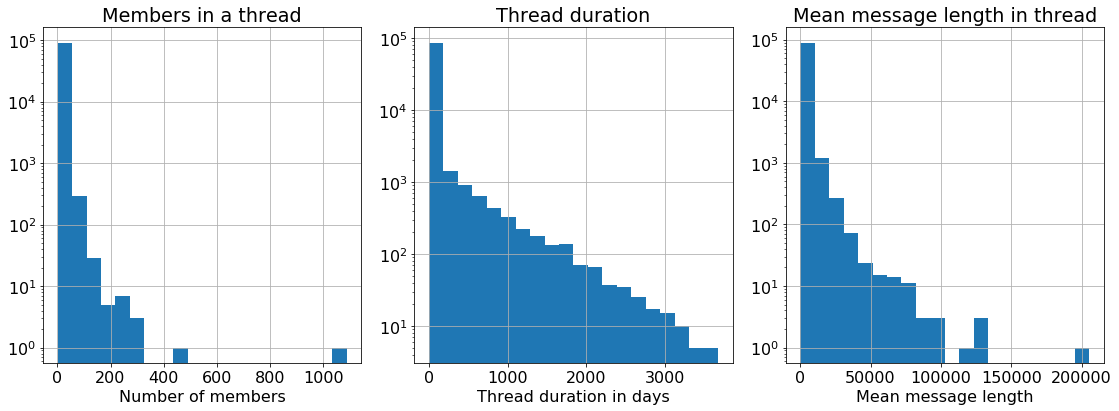

In [43]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1,3,figsize=(16,6))
axs = axs.flatten()

axs[0].hist(thread_data['N_Members'].values, bins=20)
axs[0].set_yscale('log')
axs[0].set_title('Members in a thread')
axs[0].set_xlabel('Number of members')
axs[1].hist(thread_data['N_Days'].values, bins=20)
axs[1].set_yscale('log')
axs[1].set_title('Thread duration')
axs[1].set_xlabel('Thread duration in days')
axs[2].hist(thread_data['Mean_L'].values, bins=20)
axs[2].set_yscale('log')
axs[2].set_title('Mean message length in thread')
axs[2].set_xlabel('Mean message length')
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.tight_layout()
plt.savefig('thread_hist.png')
plt.show()

In [44]:
#Collecting member information (this takes a while)
member_data = pd.DataFrame(np.zeros(len(all_members)),index=all_members,columns=['N_Threads'])
member_data['N_Days'] = 0
member_data['Mean_L'] = 0
ii = 0
for i in all_members:
    one_data = data[data['MemberID']==i]
    #Get time frame
    delta_t = one_data["P_Date"].max() - one_data["P_Date"].min()
    member_data.loc[i, 'N_Days'] = delta_t.days + delta_t.seconds/(60*60*24)
    member_data.loc[i, 'N_Threads'] = int(len(one_data["ThreadID"].unique()))
    member_data.loc[i, 'Mean_L'] = one_data[" MessageLength"].mean()
    ii = ii + 1
    if ii%1000==0:
        print(ii,'out of',len(all_members))

member_data.head()

1000 out of 17182
2000 out of 17182
3000 out of 17182
4000 out of 17182
5000 out of 17182
6000 out of 17182
7000 out of 17182
8000 out of 17182
9000 out of 17182
10000 out of 17182
11000 out of 17182
12000 out of 17182
13000 out of 17182
14000 out of 17182
15000 out of 17182
16000 out of 17182
17000 out of 17182


,N_Threads,N_Days,Mean_L
72,191.0,34.286806,484.281633
40,426.0,771.626389,505.828652
15097,1638.0,1365.415972,368.507891
13617,2549.0,1744.816667,401.746034
4153,2942.0,1373.381944,622.026658


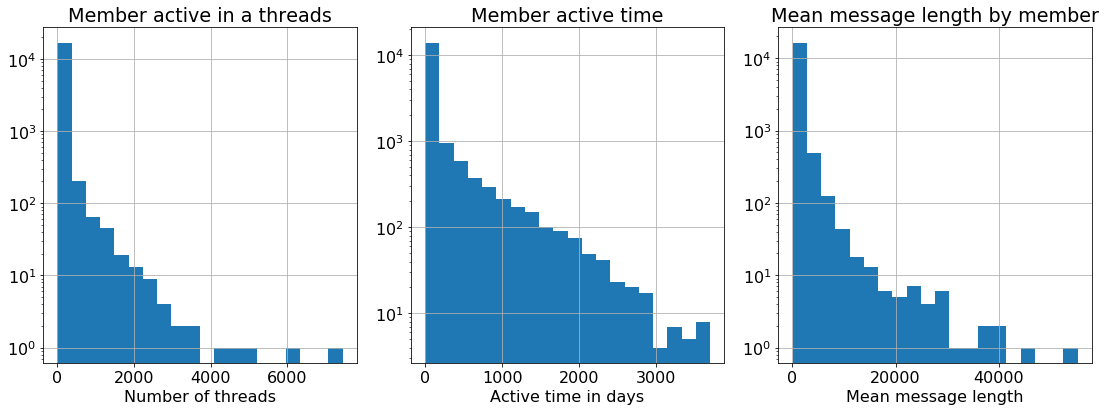

In [106]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1,3,figsize=(16,6))
axs = axs.flatten()

axs[0].hist(member_data['N_Threads'].values, bins=20)
axs[0].set_yscale('log')
axs[0].set_title('Member active in a threads')
axs[0].set_xlabel('Number of threads')
axs[1].hist(member_data['N_Days'].values, bins=20)
axs[1].set_yscale('log')
axs[1].set_title('Member active time')
axs[1].set_xlabel('Active time in days')
axs[2].hist(member_data['Mean_L'].values, bins=20)
axs[2].set_yscale('log')
axs[2].set_title('Mean message length by member')
axs[2].set_xlabel('Mean message length')
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.tight_layout()
plt.savefig('member_hist.png')
plt.show()

Data has messages a little over 10 years worth. For simplicity 520 weeks, will be used as the total time frame. Starting from the first recorded event.

In [4]:
df_member = data.groupby('MemberID')['ThreadID'].nunique()
df_message = data.groupby('MemberID')[' MessageLength'].mean()
df_thread = data.groupby('ThreadID')['MemberID'].nunique()

In [55]:
member_data.loc[116, 'Mean_L']

351.71337579617835

In [5]:
print("Members active in")
print(df_member.describe())
print("Threads have")
print(df_thread.describe())
print("Member message lengths have")
print(df_message.describe())

Members active in
count    17182.000000
mean        35.607205
std        185.789060
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max       7437.000000
Name: ThreadID, dtype: float64
Threads have
count    91313.000000
mean         6.700065
std         10.004308
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       1089.000000
Name: MemberID, dtype: float64
Member message lengths have
count    17182.000000
mean       826.126398
std       1713.474926
min         24.000000
25%        249.149891
50%        457.000000
75%        828.213043
max      55290.333333
Name:  MessageLength, dtype: float64


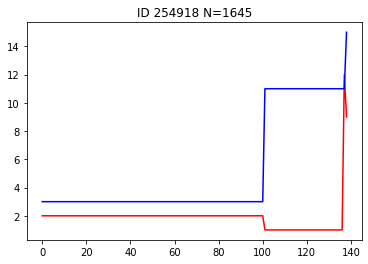

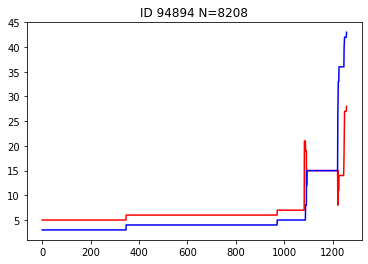

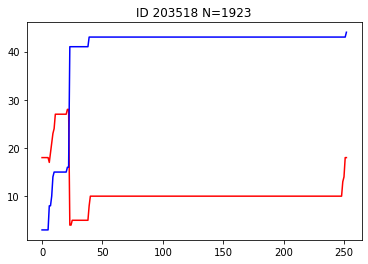

In [97]:
#This functions finds SIR paramters "n" thread IDs for threads which have more than "m_min" and less than "m_max" messages. 
def get_threads(data, n, m_min, m_max, min_time_days, min_members):
    i = 0
    IDs = np.zeros(n) 
    while i<n:
        #Take a random choice
        idx = np.random.choice(all_threads)
        one_data = data[data['ThreadID']==idx]
        #Get time frame
        delta_t = one_data["P_Date"].max() - one_data["P_Date"].min()
        #Get number of members
        N = len(one_data["MemberID"].unique())
        #Check if data has right amount of messages
        if one_data.shape[0]>m_min & one_data.shape[0]<m_max & delta_t.days>min_time_days & N >= min_members:
            #Save the id
            IDs[i] = idx
            i += 1
    return IDs

#This functions finds SIR paramters from a single thread
def get_SIR_data(data, idx):
    #Select data
    one_data = data[data['ThreadID']==idx]
    #Find out the thread duration
    t0 = one_data["P_Date"].min() 
    t_stop = one_data["P_Date"].max()
    delta_t = t_stop - t0
    t_step = pd.Timedelta(np.timedelta64(24, 'h'))
    t1 = t0 + t_step
    #Assuming the population N is all possible contacts at in that time frame
    mask = (data["P_Date"]>=t0) & (data["P_Date"]<=t_stop)
    N = len(data[mask]["MemberID"].unique())
    #Calculating the number of infectious, I, those participating to the thread
    #Calculating the number of recovered, R, those inactive on the thread
    #Initialize member data
    infec_members = {}
    recov_members = {}
    m_I = np.zeros(delta_t.days+1)
    m_R = np.zeros(delta_t.days+1)
    day_i = 0
    rec = 0
    while t0<t_stop:
        #Select one week of data
        mask = (one_data["P_Date"]>=t0) & (one_data["P_Date"]<t1)
        week_members = one_data[mask]["MemberID"].unique()
        #Add infected members
        for i in week_members:
            infec_members[i] = 1
        #Check if members are inactive
        temp = copy.deepcopy(infec_members)
        for j in infec_members.keys():
            if not np.any(week_members==j):
                temp[j] += 1
            if int(infec_members[j]) > 7:
                temp.pop(j)
                rec += 1
        infec_members = copy.deepcopy(temp)
        #Save how many members are infected
        m_I[day_i] = len(infec_members)
        m_R[day_i] = rec
        t0 += t_step
        t1 += t_step
        day_i += 1
    #Estimating the number of population
    #N = max(max(m_I)*2, max(m_R)*2)
    m_S = N - m_I - m_R
    return m_S, m_I, m_R, N

#This functions finds SIR paramters from a single thread
def get_SIR_data_mes(data, member_data, idx):
    #Select data
    one_data = data[data['ThreadID']==idx]
    #Find out the thread duration
    t0 = one_data["P_Date"].min() 
    t_stop = one_data["P_Date"].max()
    delta_t = t_stop - t0
    t_step = pd.Timedelta(np.timedelta64(24, 'h'))
    t1 = t0 + t_step
    #Assuming the population N is all possible contacts at in that time frame
    mask = (data["P_Date"]>=t0) & (data["P_Date"]<=t_stop)
    N = len(data[mask]["MemberID"].unique())
    #N = int(N/5)
    #Calculating the number of infectious, I, those participating to the thread
    #Calculating the number of recovered, R, those inactive on the thread
    #Initialize member data
    infec_members = {}
    recov_members = {}
    m_I = np.zeros(delta_t.days+1)
    m_R = np.zeros(delta_t.days+1)
    day_i = 0
    rec = 0
    while t0<t_stop:
        #Select one week of data
        mask = (one_data["P_Date"]>=t0) & (one_data["P_Date"]<t1)
        week_members = one_data[mask]["MemberID"].unique()
        #Add infected members
        for i in week_members:
            #print(i,member_data.loc[i, 'Mean_L'])
            infec_members[i] = one_data[one_data["MemberID"]==i][' MessageLength'].mean()
        #Check if members message length is below threshold
        temp = copy.deepcopy(infec_members)
        for j in infec_members.keys():
            #if not np.any(week_members==j):
            #    temp[j] += 1
            #print(infec_members[j])
            if int(infec_members[j]) < member_data.loc[i, 'Mean_L']*0.5:
                temp.pop(j)
                rec += 1
        infec_members = copy.deepcopy(temp)
        #Save how many members are infected
        m_I[day_i] = len(infec_members)
        m_R[day_i] = rec
        t0 += t_step
        t1 += t_step
        day_i += 1
    #Estimating the number of population
    #N = max(max(m_I)*2, max(m_R)*2)
    m_S = N - m_I - m_R
    return m_S, m_I, m_R, N

n_threads = 3
message_min = 30
message_max = 5000
min_days = 30
min_members = 15

test_IDs = get_threads(data, n_threads, message_min, message_max, min_days, min_members)

#Sample plots
for i in test_IDs:
    #m_S, m_I, m_R, N = get_SIR_data(data, i)
    m_S, m_I, m_R, N = get_SIR_data_mes(data, member_data, i)
    #plt.plot(m_S, 'k')
    plt.plot(m_I, 'r')
    plt.plot(m_R, 'b')
    plt.title('ID '+str(int(i))+' N='+str(N))
    #plt.legend(['S','I','R'])
    plt.show()
    

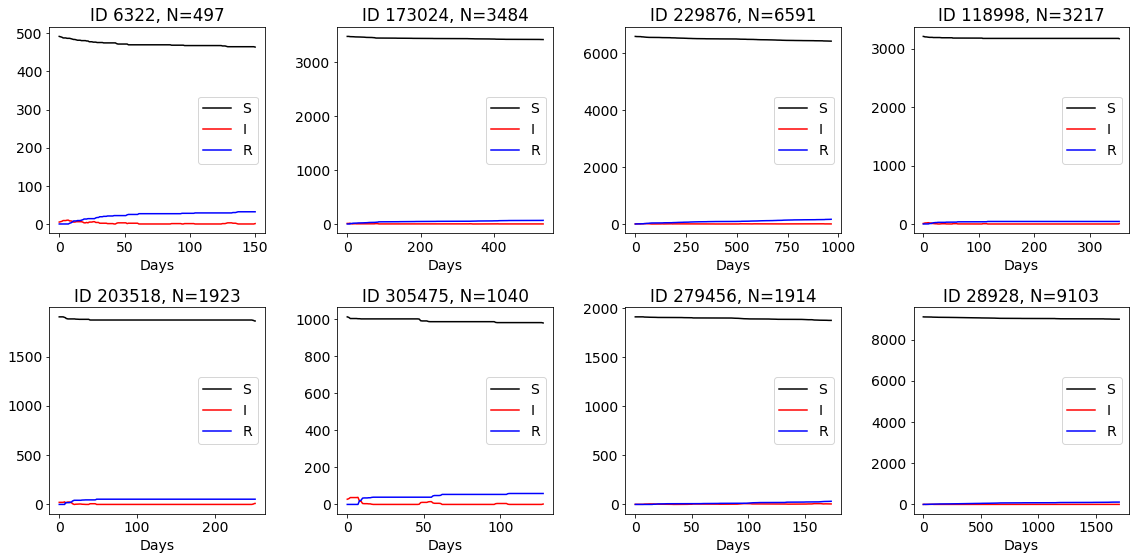

In [67]:
#Selected 8 threads for study SIR model
study_IDs = [6322,173024,229876,118998,203518,305475,279456,28928]

plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()
for i in range(8):
    m_S, m_I, m_R, N = get_SIR_data(data, study_IDs[i])
    axs[i].plot(m_S, 'k')
    axs[i].plot(m_I, 'r')
    axs[i].plot(m_R, 'b')
    axs[i].set_title('ID '+str(int(study_IDs[i]))+', N='+str(int(N)))
    axs[i].set_xlabel('Days')
    axs[i].legend(['S','I','R'])
plt.tight_layout()
plt.savefig('study_threads.png')
plt.show()

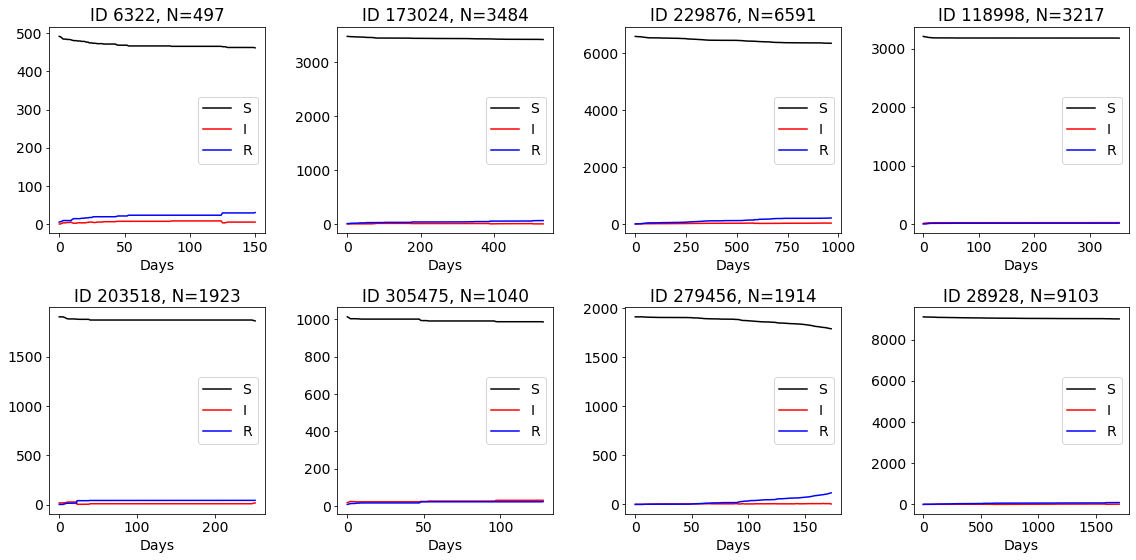

In [98]:
#Selected 8 threads for study SIR model with message length
study_IDs = [6322,173024,229876,118998,203518,305475,279456,28928]

plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()
for i in range(8):
    m_S, m_I, m_R, N = get_SIR_data_mes(data, member_data, study_IDs[i])
    axs[i].plot(m_S, 'k')
    axs[i].plot(m_I, 'r')
    axs[i].plot(m_R, 'b')
    axs[i].set_title('ID '+str(int(study_IDs[i]))+', N='+str(int(N)))
    axs[i].set_xlabel('Days')
    axs[i].legend(['S','I','R'])
plt.tight_layout()
plt.savefig('study_threads_mes.png')
plt.show()

ID 6322 b 0.00026962342091848906 g 0.15382904451500695
ID 173024 b 1.2563472480971602e-05 g 0.05205891253069041
ID 229876 b 2.962011540596281e-05 g 0.193940583483201
ID 118998 b 3.2575198572234575e-05 g 0.13139734791407326
ID 203518 b 4.192904860988975e-05 g 0.1302418202087898
ID 305475 b 4.7354797059916517e-05 g 0.09892834474408217
ID 279456 b 5.1817773021376994e-05 g 0.09092106082764134
ID 28928 b 1.3078317457272708e-05 g 0.11935687345362377


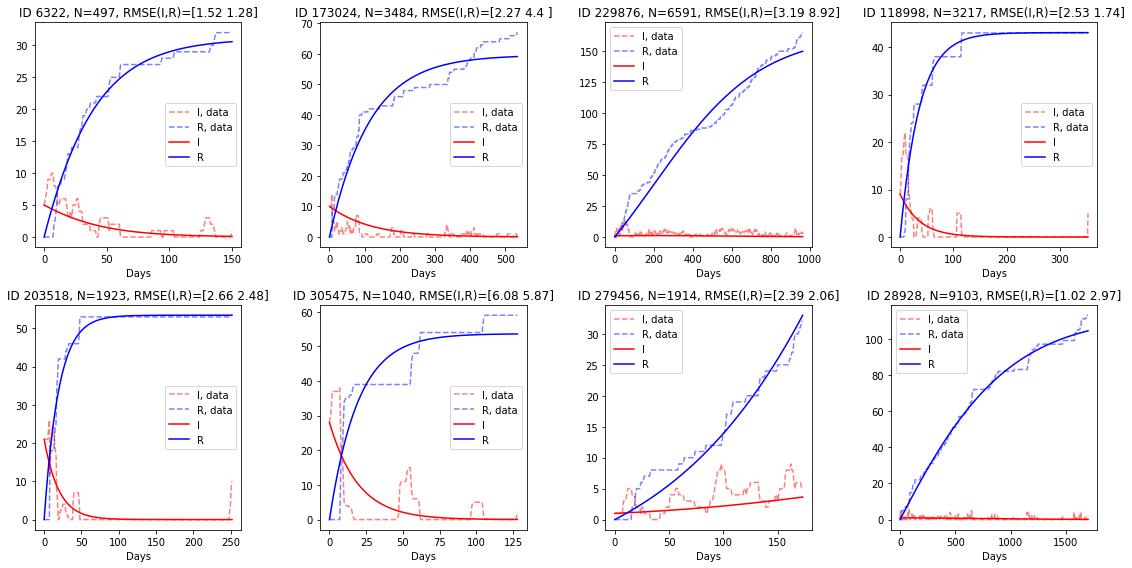

In [73]:
#Solving the SIR-parameters for simulations
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()
for i in range(8):
    m_S, m_I, m_R, N = get_SIR_data(data, study_IDs[i])
    def sumsq(p):
        beta, gamma = p
        def SIR(t,y):
            S = y[0]
            I = y[1]
            R = y[2]
            return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
        sol = solve_ivp(SIR,[0,len(m_S)],[m_S[0],m_I[0],m_R[0]],t_eval=np.arange(0,len(m_S),1))
        return(sum((sol.y[1]-m_I)**2)+sum((sol.y[2]-m_R)**2))
    msol = minimize(sumsq,[0.00001,0.1],method='Nelder-Mead')
    beta,gamma = msol.x
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR,[0,len(m_S)],[m_S[0],m_I[0],m_R[0]],t_eval=np.arange(0,len(m_S),1))
    error_i = np.sqrt(sum((sol.y[1]-m_I)**2)/len(m_I))
    error_r = np.sqrt(sum((sol.y[2]-m_R)**2)/len(m_R))
    axs[i].plot(m_I,"r--",alpha=0.5)
    axs[i].plot(m_R,"b--",alpha=0.5)
    axs[i].plot(sol.t,sol.y[1],'r')
    axs[i].plot(sol.t,sol.y[2],'b')
    axs[i].legend(["I, data","R, data","I","R"])
    axs[i].set_xlabel('Days')
    axs[i].set_title('ID '+str(int(study_IDs[i]))+', N='+str(int(N))+', RMSE(I,R)='+str(np.round((error_i,error_r),2)))
    print("ID",study_IDs[i],"b",beta, "g",gamma)

plt.tight_layout()
plt.savefig('study_sim_threads.png')
plt.show()

ID 6322 b 1e-05 g 0.05
ID 173024 b 2.270314324543265e-05 g 0.0805530190020306
ID 229876 b 2.9799642570045953e-05 g 0.19381555389561206
ID 118998 b 2.235922949478462e-06 g 0.0037318369887552787
ID 203518 b 2.3407853780372655e-05 g 0.07765555450904393
ID 305475 b 1.0695089147754163e-05 g 0.006388108976449787
ID 279456 b 7.546744558341702e-05 g 0.12720375992790128
ID 28928 b 1.4926448900697568e-05 g 0.13705490334894552


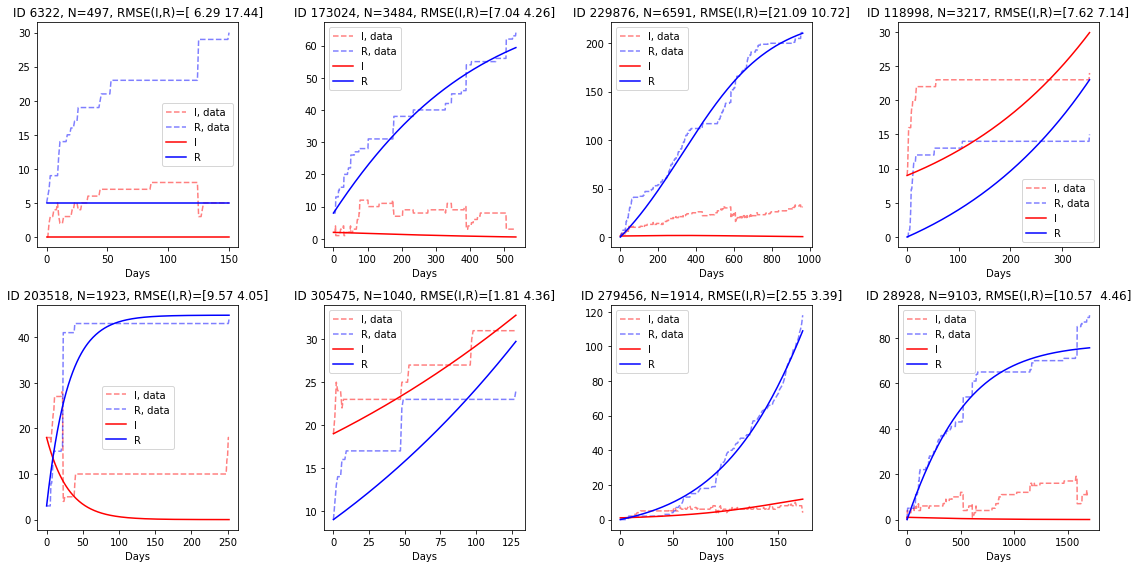

In [108]:
#Solving the SIR-parameters for simulations with message length
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()
for i in range(8):
    m_S, m_I, m_R, N = get_SIR_data_mes(data, member_data, study_IDs[i])
    def sumsq(p):
        beta, gamma = p
        def SIR(t,y):
            S = y[0]
            I = y[1]
            R = y[2]
            return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
        sol = solve_ivp(SIR,[0,len(m_S)],[m_S[0],m_I[0],m_R[0]],t_eval=np.arange(0,len(m_S),1))
        return(sum(1000*(sol.y[1]-m_I)**2)+sum(1000*(sol.y[2]-m_R)**2))
    msol = minimize(sumsq,[1.0e-5,0.05],method='Nelder-Mead')
    beta,gamma = msol.x
    def SIR(t,y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    sol = solve_ivp(SIR,[0,len(m_S)],[m_S[0],m_I[0],m_R[0]],t_eval=np.arange(0,len(m_S),1))
    error_i = np.sqrt(sum((sol.y[1]-m_I)**2)/len(m_I))
    error_r = np.sqrt(sum((sol.y[2]-m_R)**2)/len(m_R))
    axs[i].plot(m_I,"r--",alpha=0.5)
    axs[i].plot(m_R,"b--",alpha=0.5)
    axs[i].plot(sol.t,sol.y[1],'r')
    axs[i].plot(sol.t,sol.y[2],'b')
    axs[i].legend(["I, data","R, data","I","R"])
    axs[i].set_xlabel('Days')
    axs[i].set_title('ID '+str(int(study_IDs[i]))+', N='+str(int(N))+', RMSE(I,R)='+str(np.round((error_i,error_r),2)))
    print("ID",study_IDs[i],"b",beta, "g",gamma)

plt.tight_layout()
plt.savefig('study_sim_mes_threads.png')
plt.show()

KeyboardInterrupt: 

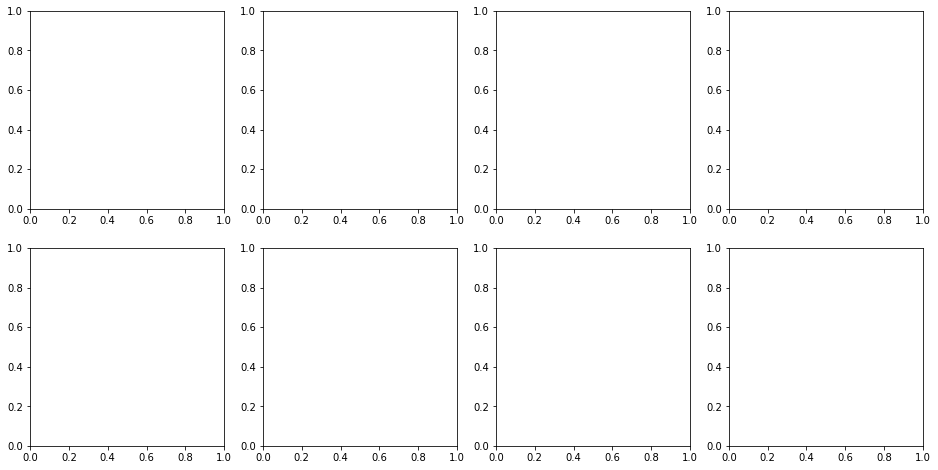

In [38]:
#Solving the SIS-parameters for simulations
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

plt.rcParams.update({'font.size': 10})
fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()
for i in range(1):
    m_S, m_I, m_R, N = get_SIR_data(data, study_IDs[i])
    def sumsq(p):
        beta, gamma = p
        def SIS(t,y):
            S = y[0]
            I = y[1]
            return([-beta*S*I+gamma*I, beta*S*I-gamma*I])
        sol = solve_ivp(SIS,[0,len(m_S)],[m_S[0],m_I[0]],t_eval=np.arange(0,len(m_S),1))
        return(sum((sol.y[1]-m_I)**2)+sum((sol.y[0]-m_S)**2))
    msol = minimize(sumsq,[1.01,0.1],method='Nelder-Mead',options={'maxiter': 1000, 'disp': True})
    beta,gamma = msol.x
    def SIS(t,y):
        S = y[0]
        I = y[1]
        return([-beta*S*I+gamma*I, beta*S*I-gamma*I])
    sol = solve_ivp(SIS,[0,len(m_S)],[m_S[0],m_I[0]],t_eval=np.arange(0,len(m_S),1))
    error_i = np.sqrt(sum((sol.y[1]-m_I)**2)/len(m_I))
    error_s = np.sqrt(sum((sol.y[0]-m_S)**2)/len(m_S))
    axs[i].plot(m_I,"r--",alpha=0.5)
    #axs[i].plot(m_S,"k--",alpha=0.5)
    axs[i].plot(sol.t,sol.y[1],'r')
    #axs[i].plot(sol.t,sol.y[0],'k')
    #axs[i].legend(["I, data","S, data","I","S"])
    axs[i].set_xlabel('Days')
    axs[i].set_title('ID '+str(int(study_IDs[i]))+', N='+str(int(N))+', RMSE(I,R)='+str(np.round((error_i,error_s),2)))
    print("ID",study_IDs[i],"b",beta, "g",gamma)

plt.tight_layout()
plt.savefig('study_sim_threads.png')
plt.show()

Simulation complete.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


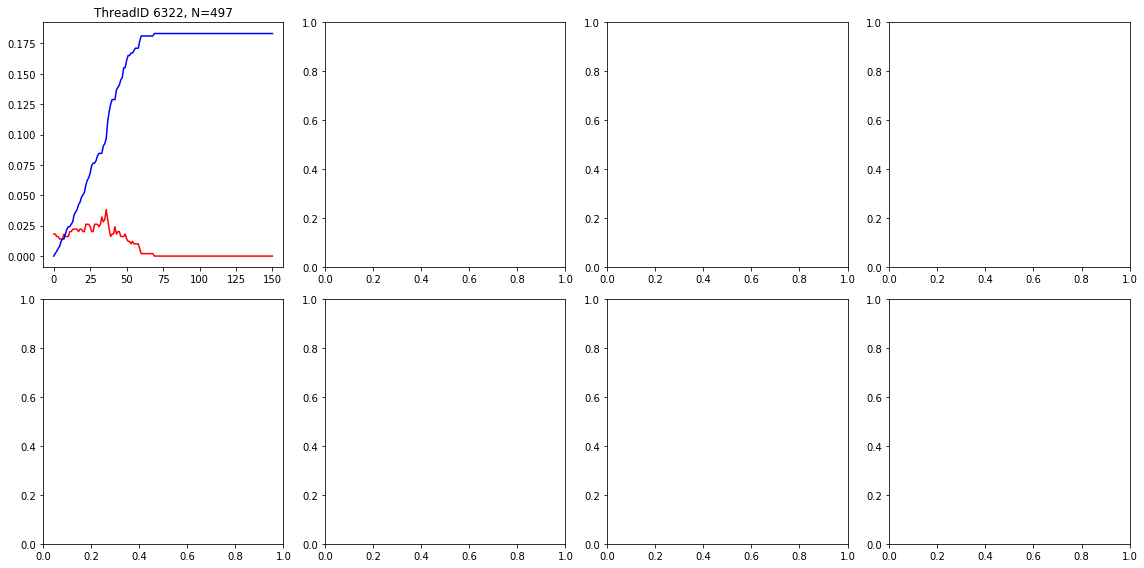

In [248]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

fig, axs = plt.subplots(2,4,figsize=(16,8))
axs = axs.flatten()

# Network topology
for i in range(1):
    beta_i = 0.00026962342091848906
    N_sim = N_test[i]
    g_sim = nx.erdos_renyi_graph(497, 1)
    # Model selection
    model = ep.SIRModel(g_sim)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.00026962342091848906)
    cfg.add_model_parameter('gamma', 0.15382904451500695)
    cfg.add_model_parameter("fraction_infected", 0.02)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(int(time_test[i]))
    trends = model.build_trends(iterations)

    # Visualization
    viz = DiffusionTrend(model, trends)
    ff = viz.iteration_series(50)

    #axs[i].plot(ff[0][0]/N_sim,'k')
    axs[i].plot(ff[1][0]/N_sim,'r')
    axs[i].plot(ff[2][0]/N_sim,'b')
    #axs[i].legend(["S","I","R"])
    axs[i].set_title('ThreadID '+str(int(study_IDs[i]))+', N='+str(int(N_sim)))

print("Simulation complete.")
plt.tight_layout()
plt.savefig('study_sim_threads.png')
plt.show()

In [101]:
def get_freq(data,idx):
    one_data = data[data['ThreadID']==idx]
    activity = np.array([0,0])
    if one_data.shape[0]>35 & one_data.shape[0]<500:
        time = 0
        t0 = one_data["P_Date"].min() 
        t_stop = one_data["P_Date"].max()
        step = (t_stop-t0)/100
        step = pd.Timedelta(np.timedelta64(24, 'h'))
        t1 = one_data["P_Date"].min() + step
        activity = np.array([0,0])
        while t_stop>t1:
            mask = (one_data["P_Date"]>=t0) & (one_data["P_Date"]<t1)
            time = time + 1
            activity = np.vstack((activity,np.array([time,one_data[mask].shape[0]])))
            t0 = t0 + step
            t1 = t0 + step
        y = activity[:,1]/max(activity[:,1])
    return activity

tset = all_threads
hmap = np.zeros((100,100))
for idx in tset:
    ac = get_freq(data,idx)
    if ac.shape[0]>2:
        y = np.round(ac[:,1]/max(ac[:,1])*99)
        for i in range(100):
            hmap[i,int(y[i])] = hmap[i,int(y[i])] + 1 
print("Done")

IndexError: index 36 is out of bounds for axis 0 with size 36

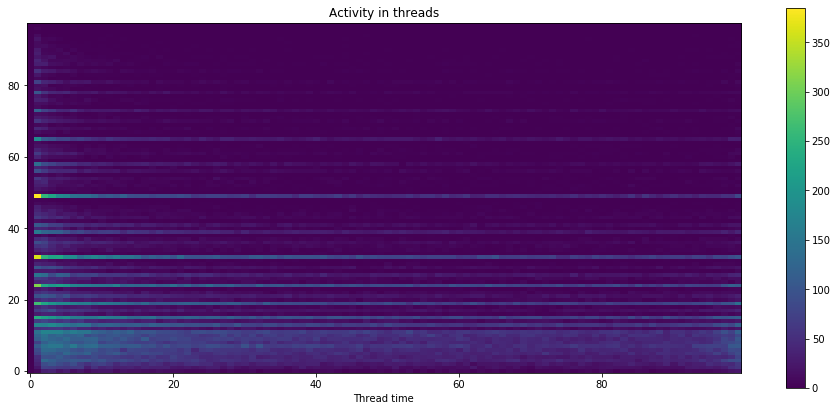

In [550]:
plt.figure(figsize=(16,7))
plt.imshow((hmap[0:100,1:99]).T, origin='lower', aspect=0.5)
plt.colorbar()
plt.title("Activity in threads")
plt.xlabel("Thread time")
plt.show()

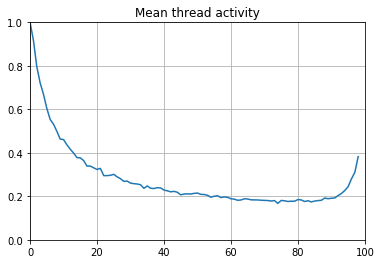

In [558]:
plt.plot((np.sum(hmap[1:100,1:99],axis=1))/6000)
plt.grid()
plt.title("Mean thread activity")
plt.axis([0,100,0,1])
plt.show()

In [242]:
def get_times(data,idx):
    one_data = data[data['ThreadID']==idx]
    t0 = one_data["P_Date"].min() 
    t1 = one_data["P_Date"].max()
    return t1-t0

In [537]:
#Finding active threads by week
start_date = data["P_Date"].min()
end_date = start_date + pd.Timedelta(np.timedelta64(24*7, 'h'))

#Time span of 10 years
weeks=52*10
#Initialize variables
t_week = np.zeros(weeks)
a_week = np.zeros(weeks)
aa_week = np.zeros(weeks)
an_week = np.zeros(weeks)
ac_week = np.zeros(weeks)
active_authors = {}
import copy
for i in range(weeks):
    #Select data
    mask = (data["P_Date"] >= start_date) & (data["P_Date"] < end_date)
    #Find active threads
    active = data[mask]["ThreadFirstMessageID"].unique()
    #Find active authors
    authors = data[mask]["MemberID"].unique()
    n_authors = len(authors)
    if i==0:
        old_authors = data[mask]["MemberID"].unique()
        for j in old_authors:
            active_authors[j] = 1
    n_active = len(active)
    #Check if there is new authors
    n_new_authors = 0
    ac = 0
    for j in authors:
        if not np.any(old_authors==j):
            old_authors = np.hstack((old_authors,j))
            n_new_authors += 1
        active_authors[j] = 1
    temp = copy.deepcopy(active_authors)
    for j in active_authors.keys():
        if not np.any(authors==j):
            temp[j] += 1
        if int(active_authors[j]) > 4*3:
            temp.pop(j)
            ac += 1
    active_authors = copy.deepcopy(temp)
    #Move time step
    start_date += pd.Timedelta(np.timedelta64(24*7, 'h'))
    end_date += pd.Timedelta(np.timedelta64(24*7, 'h'))
    #Save variable data
    t_week[i] = i
    a_week[i] = n_active
    an_week[i] = n_new_authors
    aa_week[i] = n_authors
    ac_week[i] = ac

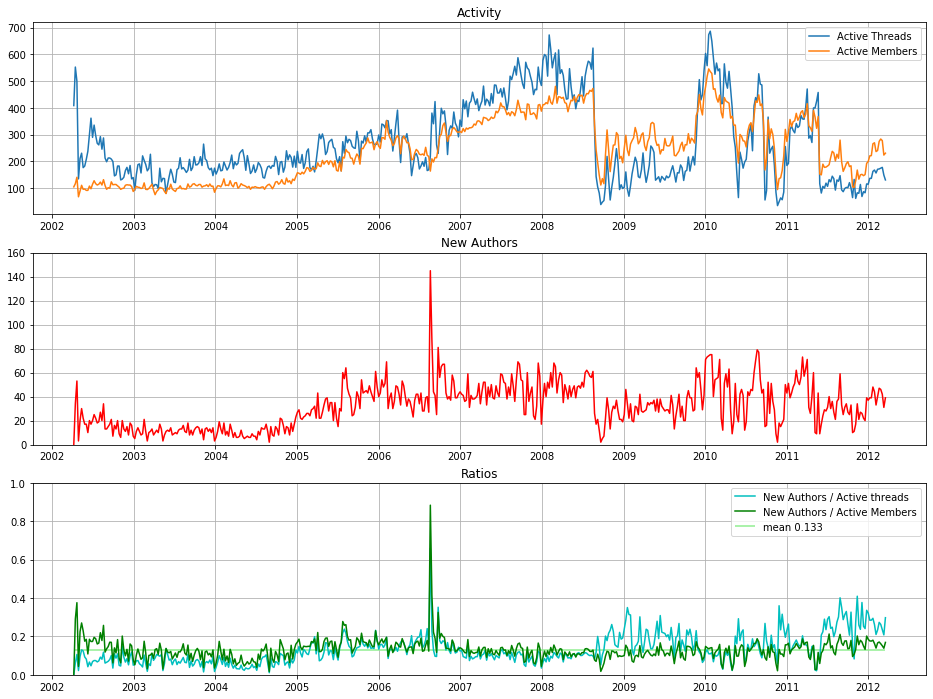

In [539]:
fig, axs = plt.subplots(3,figsize=(16,12))

timeline = pd.Series(range(52*10), index=pd.date_range('2002-04-01', freq='W', periods=52*10)).index
axs[0].plot(timeline,a_week)
axs[0].plot(timeline,aa_week)
axs[0].grid()
axs[0].set_title("Activity")
axs[0].legend(["Active Threads", "Active Members"])
axs[1].plot(timeline,an_week,'r')
axs[1].grid()
axs[1].set_ylim([0, 160])
axs[1].set_title("New Authors")
axs[2].plot(timeline,an_week/a_week,'c')
axs[2].plot(timeline,an_week/aa_week,'g')
axs[2].grid()
axs[2].set_title("Ratios")
axs[2].set_ylim([0, 1])
axs[2].hlines(np.mean(an_week/aa_week),min(timeline),max(timeline),'lightgreen')
axs[2].legend(["New Authors / Active threads", "New Authors / Active Members","mean "+str(round(np.mean(an_week/a_week),3))])
plt.savefig("activity_total.png")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


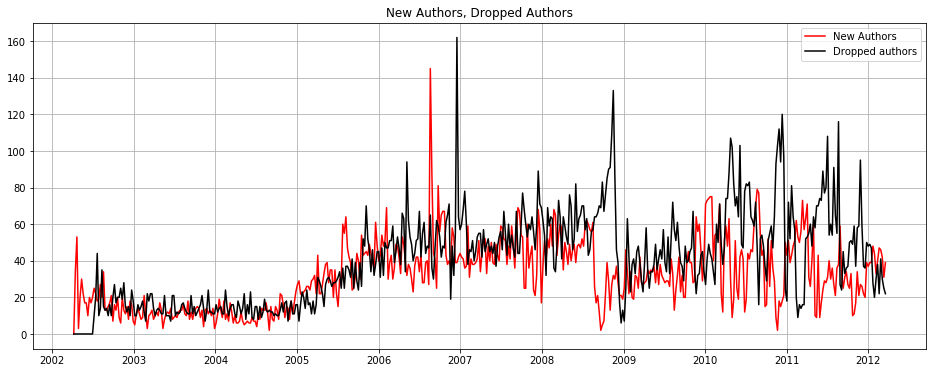

In [1112]:
fig, axs = plt.subplots(figsize=(16,6))

timeline = pd.Series(range(52*10), index=pd.date_range('2002-04-01', freq='W', periods=52*10)).index

axs.plot(timeline,an_week,'r')
axs.plot(timeline,ac_week,'k')
axs.grid()
axs.set_title("New Authors, Dropped Authors")
axs.legend(["New Authors","Dropped authors"])
plt.show()

In [772]:
tset = all_members#[0:200]

idx=0
a_message = np.zeros(100)
t_member = np.zeros(len(tset))
for i in tset:
    member_data = data[data['MemberID'] == i]
    if len(member_data)>5:
        member_data = member_data.sort_values(by=['P_Date'])
        x = member_data["P_Date"]
        tt = x.max()-x.min()
        t_member[idx] = tt.total_seconds()
        x = x-x.min()
        x = x.dt.total_seconds()
        x = np.round(x/max(x)*99)
        x = x.values
        y = member_data[" MessageLength"].values
        temp = np.zeros(100)
        #Collecting messages lengths to scaled time
        for j in range(len(x)):
            temp[int(x[j])] = temp[int(x[j])] + y[j] 
        idx += 1
        a_message += temp

print(idx,'Members wrote more than 5 messages.')
print('Average of',np.round(np.mean(t_member[0:idx]/(3600*24*365))), 'active years.')

7165 Members wrote more than 5 messages.
Average of 1.0 active years.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


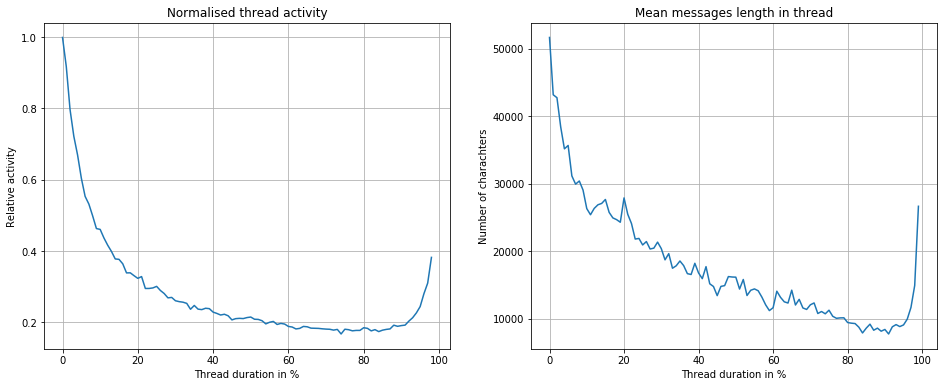

In [1122]:
fig, axs = plt.subplots(1,2, figsize=(16,6))

axs[0].plot((np.sum(hmap[1:100,1:99],axis=1))/6000)
axs[0].grid()
axs[0].set_title("Normalised thread activity")
axs[0].set_xlabel("Thread duration in %")
axs[0].set_ylabel("Relative activity")

axs[1].plot(a_message/idx)
axs[1].grid()
axs[1].set_title("Mean messages length in thread")
axs[1].set_ylabel("Number of charachters")
axs[1].set_xlabel("Thread duration in %")

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


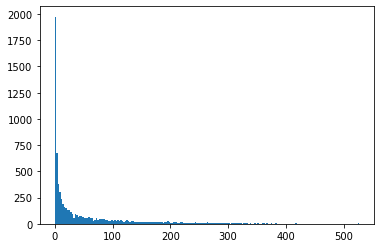

In [792]:
from scipy import stats
stats.describe(t_member[0:idx]/(3600*24*365))
plt.hist(t_member[0:idx]/(3600*24*365)*52,bins=200)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:84: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


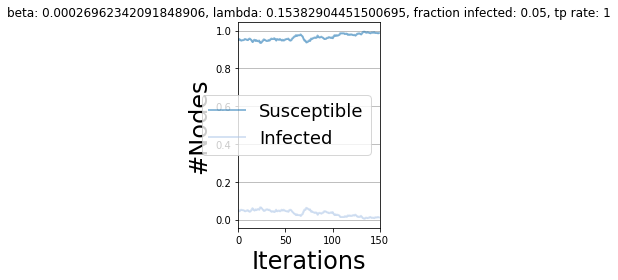

In [250]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Network topology
gh = nx.erdos_renyi_graph(497, 1)

# Model selection
model = ep.SISModel(gh)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta',0.00026962342091848906)
cfg.add_model_parameter('lambda',0.15382904451500695)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(150)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
viz.plot()

## SIR-model estimations

Basic assumption of the data. 
* Those members who are writing and participating are Infectious. 
* Those who have been inactive for 12 weeks are Recovered. 
* The number of Susceptibles is unknown.

In [978]:
#Finding active threads by week.
#Creating network representation of activity data and saving member activity with 12 week history.
g = nx.Graph()
options = {
    'node_size': 200,
    'width': 1,
    'alpha': 0.6
} 
#Initial data
idx=0
start_date = data["P_Date"].min()
end_date = start_date + pd.Timedelta(np.timedelta64(24*7, 'h'))
old_members = {} #This keeps track of the active members, member set to 1 if active and +1 if inactive
member_hist = np.zeros((52*10,12))
for w in range(52*10):
    mask = (data["P_Date"] >= start_date) & (data["P_Date"] < end_date)
    data_snap = data[mask]
    threads = data_snap['ThreadID'].unique()
    #Collecting active members from each thread and creating fully connected graph between thread members
    for i in threads:
        m = data_snap[data_snap['ThreadID']==i]['MemberID']
        for j in m:
            g.add_node(j)
            old_members[j] = 1
        for j in m:
            for k in m:
                if not j==k:
                    g.add_edge(j,k)
    #Check for inactive nodes
    temp = copy.deepcopy(old_members)
    for j in old_members.keys():
        if not np.any(m.values==j):
            temp[j] += 1
        if int(old_members[j]) > 4*3:
            temp.pop(j)
            g.remove_node(j)
    old_members = copy.deepcopy(temp)    
    #Save hist data
    for i in range(12):
        member_hist[idx,i] = np.sum(np.array(list(old_members.values()))==i+2)
    #Move time forward
    start_date += pd.Timedelta(np.timedelta64(24*7, 'h'))
    end_date += pd.Timedelta(np.timedelta64(24*7, 'h'))
    #Plot the network
    c_node = np.zeros(len(g.nodes))
    dc=nx.degree_centrality(g)
    ix=0
    for i in g.nodes:
        c_node[ix] = dc[i]
        ix += 1
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(g, k=0.8)
    nx.draw(g, pos,with_labels=True, cmap=plt.get_cmap('plasma'), node_color=c_node, **options)
    plt.savefig("images/test_"+str(idx)+".png")
    plt.close()
    plt.figure(figsize=(8,8))
    plt.bar(np.linspace(1,12,12),member_hist[idx,:])
    plt.text(6,250,nx.info(g),fontsize=14)
    plt.xlabel("Weeks of inactivity")
    plt.ylim([0,350])
    plt.savefig("images/bar_"+str(idx)+".png")
    plt.close()
    idx += 1
    if idx%52==0:
        print(idx)

52
104
156
208
260
312
364
416
468
520


In [981]:
member_hist[73,:]

array([112.,  25.,  15.,  17.,  24.,  21.,  18.,  11.,  12.,  17.,  12.,
        24.])

In [920]:
member_hist[idx,i] = np.sum(np.array(list(old_members.values()))==i+1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [930]:
np.linspace(1,12,12)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

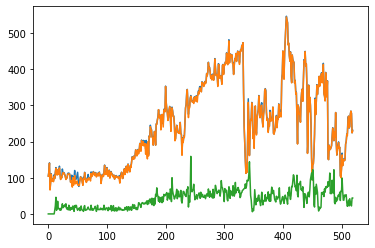

In [985]:
plt.plot(aa_week)
plt.plot(member_hist[:,0])
plt.plot(member_hist[:,11])

In [1117]:
#Collecting the SIR data, assuming there to be 200000 total in population.

N = 200000
R_member = np.zeros(520)
I_member = np.zeros(520)
for i in range(520):
    I_member[i] = sum(member_hist[0:(i+1),0])
    R_member[i] = sum(member_hist[0:(i+1),11])
S_member = N-R_member-I_member

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


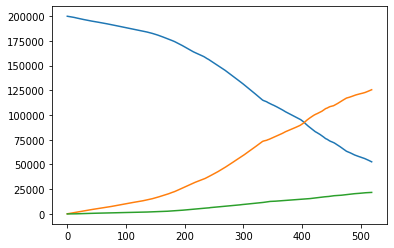

In [1101]:
plt.plot(S_member)
plt.plot(I_member)
plt.plot(R_member)
plt.show()

In [1028]:
from scipy.optimize import minimize

#Finding gamma
R_t1 = R_member[1:520]
R_t = R_member[0:519]
I_t = I_member[0:519]
#Theory states: R_t1 = R_t + gamma * I_t
def test_fun(gamma):
    return sum((R_t1 - (R_t + gamma * I_t))**2)

x0 = np.array([-0.1])
res = minimize(test_fun, x0, method='nelder-mead', options={'xatol': 1e-9, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 329891.968296
         Iterations: 31
         Function evaluations: 62
[0.00063652]


In [1099]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

# Network topology
N_test = 1000
g_test = nx.erdos_renyi_graph(N_test, 0.1)
# Model selection
model = ep.SIRModel(g_test)

# Model Configuration
cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.00012)
cfg.add_model_parameter('gamma', 0.00063652)
cfg.add_model_parameter("fraction_infected", 0.01)
model.set_initial_status(cfg)

# Simulation execution
iterations = model.iteration_bunch(52*10)
trends = model.build_trends(iterations)

# Visualization
viz = DiffusionTrend(model, trends)
ff = viz.iteration_series(50)

print("Simulation complete.")

Simulation complete.


Comparing data with simulated SIR population

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


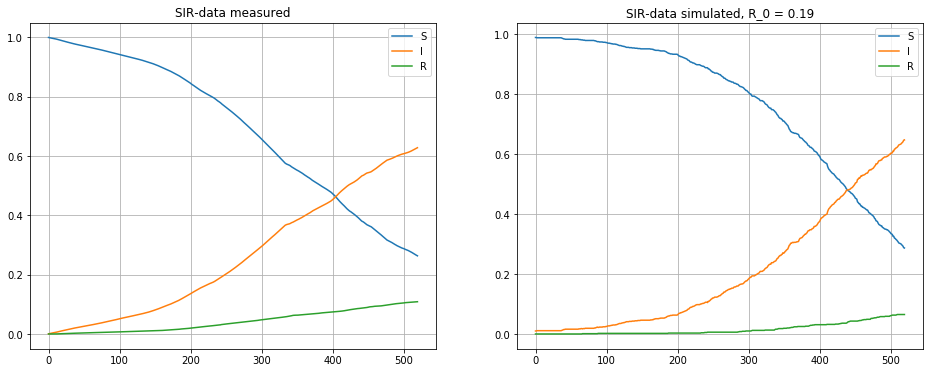

In [1128]:
N_test = 1000
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].plot(S_member/N)
axs[0].plot(I_member/N)
axs[0].plot(R_member/N)
axs[0].grid()
axs[0].set_title("SIR-data measured")
axs[0].legend(["S","I","R"])
axs[1].plot(ff[0][0]/N_test)
axs[1].plot(ff[1][0]/N_test)
axs[1].plot(ff[2][0]/N_test)
axs[1].grid()
axs[1].set_title("SIR-data simulated, R_0 = "+str(np.round(0.00012/0.00063652,2)))
axs[1].legend(["S","I","R"])
plt.savefig("SIR_sim.png")
plt.show()

In [124]:
oil_data = pd.read_csv("oil.txt", sep="\t")
oil_data['Timestamp']  = pd.to_datetime(oil_data['Timestamp'])

In [132]:
start_date = '01-01-2002'
end_date = '01-01-2012'
mask = (oil_data['Timestamp'] > start_date) & (oil_data['Timestamp'] <= end_date)
oil_data = oil_data[mask]
oil_data.head()

,Timestamp,Price,Change,Unnamed: 3
13,2002-02-01,19.98,4.33,NaN
14,2002-03-01,23.64,18.32,NaN
15,2002-04-01,25.43,7.57,NaN
16,2002-05-01,25.67,0.94,NaN
17,2002-06-01,24.49,-4.60,NaN


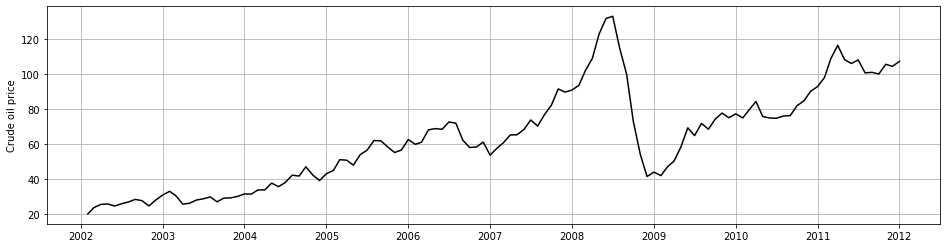

In [133]:
plt.figure(figsize=(16,4))

plt.plot(oil_data['Timestamp'],oil_data['Price'],'k')
plt.ylabel('Crude oil price')
plt.grid()
plt.show()

In [131]:
oil_data['Timestamp']>2002

TypeError: Invalid comparison between dtype=datetime64[ns] and int